In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os


# 載入數據的函數（從你的原始程式碼中提取）
def load_dataset(material, base_path="./Data/"):
    in_file1 = f"{base_path}{material}/train/B_Field.csv"
    in_file2 = f"{base_path}{material}/train/Frequency.csv"
    in_file3 = f"{base_path}{material}/train/Temperature.csv"
    in_file4 = f"{base_path}{material}/train/H_Field.csv"
    in_file5 = f"{base_path}{material}/train/Volumetric_Loss.csv"
    in_file6 = f"{base_path}{material}/train/Hdc.csv"
    in_file7 = f"{base_path}{material}/train/Turns.csv"

    data_B = np.genfromtxt(in_file1, delimiter=',')  # N x 1024
    data_F = np.genfromtxt(in_file2, delimiter=',')  # N x 1
    data_T = np.genfromtxt(in_file3, delimiter=',')  # N x 1
    data_H = np.genfromtxt(in_file4, delimiter=',')  # N x 1024
    data_Pcv = np.genfromtxt(in_file5, delimiter=',')  # N x 1
    data_Hdc = np.genfromtxt(in_file6, delimiter=',')  # N x 1
    data_N = np.genfromtxt(in_file7, delimiter=',')  # N x 1

    return data_B, data_F, data_T, data_H, data_Pcv, data_Hdc, data_N


Sample 123: Original B-field minimum at index 785.
Figure saved at: ./figure/dynamic_alignment_check/CH467160/alignment_sample_123.svg


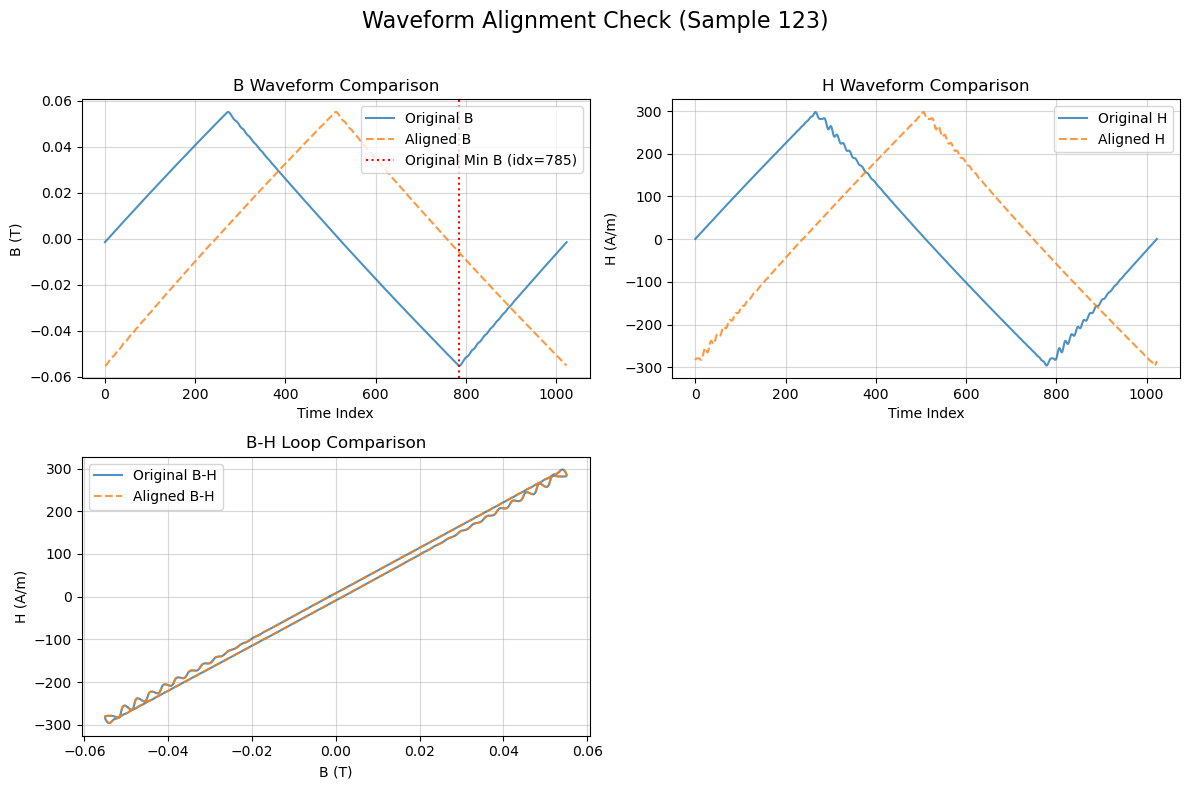


B-H Loop Area (Sample 123):
Original: 1.633962
Aligned:  1.618052
Area Difference: 0.015909


C:\Users\USER\AppData\Local\Temp\ipykernel_22468\3531695778.py:80: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.abs(np.trapz(H, B))


Sample 555: Original B-field minimum at index 871.
Figure saved at: ./figure/dynamic_alignment_check/CH467160/alignment_sample_555.svg


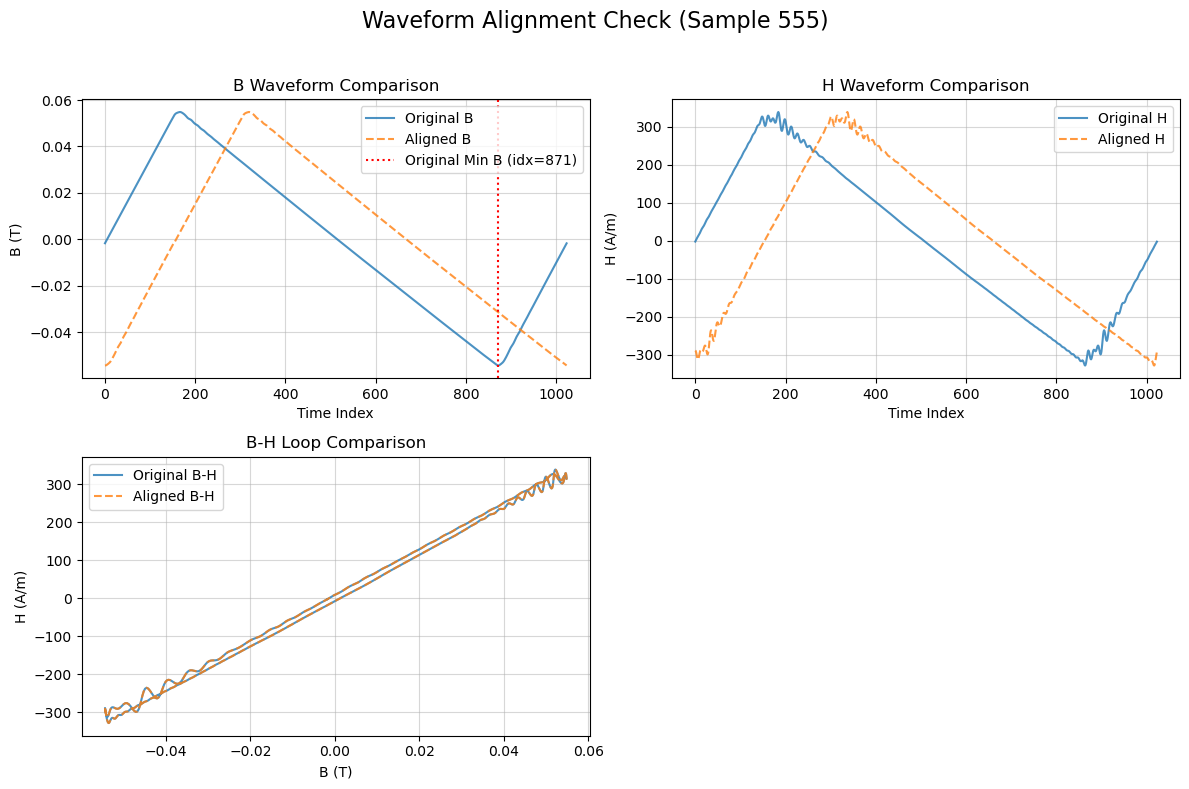


B-H Loop Area (Sample 555):
Original: 1.517996
Aligned:  1.508208
Area Difference: 0.009787


In [ ]:
def align_and_visualize_waveform(material,
                                 sample_idx=0,
                                 save_figure=True,
                                 base_path="./Data/"):
    """
    載入波形，動態地將其谷值對齊到起始點，並進行可視化比較。
    """
    # 載入數據
    data_B, _, _, data_H, _, _, _ = load_dataset(material, base_path)

    # 選擇一筆樣本
    B_orig = data_B[sample_idx].copy()
    H_orig = data_H[sample_idx].copy()

    # --- ✨ 核心修改處：動態對齊 ---
    # 1. 找到 B 波形的谷值索引
    min_b_index = np.argmin(B_orig)
    print(
        f"Sample {sample_idx}: Original B-field minimum at index {min_b_index}."
    )
    # 2. 計算需要位移的量，目標是將谷值移到 index 0
    shift_amount = -min_b_index

    # 3. 對 B 和 H 應用相同的位移
    B_aligned = np.roll(B_orig, shift=shift_amount)
    H_aligned = np.roll(H_orig, shift=shift_amount)
    # --- ✨ 修改結束 ---

    # 創建保存圖表的資料夾
    figure_save_base_path = f"./figure/dynamic_alignment_check/{material}/"
    os.makedirs(figure_save_base_path, exist_ok=True)

    # 可視化波形
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Waveform Alignment Check (Sample {sample_idx})',
                 fontsize=16)

    # B 波形比較
    plt.subplot(2, 2, 1)
    plt.plot(B_orig, label="Original B", alpha=0.8)
    plt.plot(B_aligned, label="Aligned B", linestyle="--", alpha=0.8)
    plt.axvline(x=min_b_index,
                color='r',
                linestyle=':',
                label=f'Original Min B (idx={min_b_index})')
    plt.title("B Waveform Comparison")
    plt.xlabel("Time Index")
    plt.ylabel("B (T)")
    plt.legend()
    plt.grid(alpha=0.5)

    # H 波形比較
    plt.subplot(2, 2, 2)
    plt.plot(H_orig, label="Original H", alpha=0.8)
    plt.plot(H_aligned, label="Aligned H", linestyle="--", alpha=0.8)
    plt.title("H Waveform Comparison")
    plt.xlabel("Time Index")
    plt.ylabel("H (A/m)")
    plt.legend()
    plt.grid(alpha=0.5)

    # B-H 回線比較
    plt.subplot(2, 2, 3)
    plt.plot(B_orig, H_orig, label="Original B-H", alpha=0.8)
    plt.plot(B_aligned,
             H_aligned,
             label="Aligned B-H",
             linestyle="--",
             alpha=0.8)
    plt.title("B-H Loop Comparison")
    plt.xlabel("B (T)")
    plt.ylabel("H (A/m)")
    plt.legend()
    plt.grid(alpha=0.5)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 調整佈局以容納 supertitle

    # 保存圖表
    if save_figure:
        figure_save_path = os.path.join(figure_save_base_path,
                                        f"alignment_sample_{sample_idx}.svg")
        plt.savefig(figure_save_path, format="svg")
        print(f"Figure saved at: {figure_save_path}")

    plt.show()

    # 檢查 B-H 回線面積（應該幾乎不變）
    def calculate_loop_area(B, H):
        return np.abs(np.trapz(H, B))

    area_orig = calculate_loop_area(B_orig, H_orig)
    area_aligned = calculate_loop_area(B_aligned, H_aligned)

    print(f"\nB-H Loop Area (Sample {sample_idx}):")
    print(f"Original: {area_orig:.6f}")
    print(f"Aligned:  {area_aligned:.6f}")
    print(f"Area Difference: {abs(area_aligned - area_orig):.6f}")


# 主程式
if __name__ == "__main__":
    material = "CH467160"  # 替換為你的材料名稱
    # 試試看不同的 sample index，你會發現它們都能正確對齊！
    sample_idx_1 = 123
    sample_idx_2 = 555
    align_and_visualize_waveform(material,
                                 sample_idx=sample_idx_1,
                                 save_figure=True)
    align_and_visualize_waveform(material,
                                 sample_idx=sample_idx_2,
                                 save_figure=True)

固定位移量

In [ ]:
# # 執行相位位移並可視化
# def check_phase_shift(material,
#                       sample_idx=0,
#                       save_figure=True,
#                       base_path="./Data/"):
#     # 載入數據
#     data_B, data_F, data_T, data_H, data_Pcv, data_Hdc, data_N = load_dataset(
#         material, base_path)

#     # 選擇一筆樣本
#     B_orig = data_B[sample_idx].copy()
#     H_orig = data_H[sample_idx].copy()

#     # 相位位移
#     B_90 = np.roll(B_orig, shift=160)  # 90 度 = 1024/4 = 256 點
#     H_90 = np.roll(H_orig, shift=160)
#     B_180 = np.roll(B_orig, shift=512)  # 180 度 = 1024/2 = 512 點
#     H_180 = np.roll(H_orig, shift=512)

#     # 創建保存圖表的資料夾
#     figure_save_base_path = f"./figure/phase_shift_check/{material}/"
#     os.makedirs(figure_save_base_path, exist_ok=True)

#     # 可視化波形
#     plt.figure(figsize=(12, 8))

#     # B 波形
#     plt.subplot(2, 2, 1)
#     plt.plot(B_orig, label="Original B", alpha=0.8)
#     plt.plot(B_90, label="90° Shift B", linestyle="--", alpha=0.8)
#     # plt.plot(B_180, label="180° Shift B", linestyle=":", alpha=0.8)
#     plt.title(f"B Waveform (Sample {sample_idx})")
#     plt.xlabel("Time Index")
#     plt.ylabel("B (T)")
#     plt.legend()
#     plt.grid(alpha=0.5)

#     # H 波形
#     plt.subplot(2, 2, 2)
#     plt.plot(H_orig, label="Original H", alpha=0.8)
#     plt.plot(H_90, label="90° Shift H", linestyle="--", alpha=0.8)
#     # plt.plot(H_180, label="180° Shift H", linestyle=":", alpha=0.8)
#     plt.title(f"H Waveform (Sample {sample_idx})")
#     plt.xlabel("Time Index")
#     plt.ylabel("H (A/m)")
#     plt.legend()
#     plt.grid(alpha=0.5)

#     # B-H 回線
#     plt.subplot(2, 2, 3)
#     plt.plot(B_orig, H_orig, label="Original B-H", alpha=0.8)
#     plt.plot(B_90, H_90, label="90° Shift B-H", linestyle="--", alpha=0.8)
#     # plt.plot(B_180, H_180, label="180° Shift B-H", linestyle=":", alpha=0.8)
#     plt.title(f"B-H Loop (Sample {sample_idx})")
#     plt.xlabel("B (T)")
#     plt.ylabel("H (A/m)")
#     plt.legend()
#     plt.grid(alpha=0.5)

#     # # 放大 B-H 回線的一部分（可選）
#     # plt.subplot(2, 2, 4)
#     # plt.plot(B_orig, H_orig, label="Original B-H", alpha=0.8)
#     # plt.plot(B_90, H_90, label="90° Shift B-H", linestyle="--", alpha=0.8)
#     # plt.plot(B_180, H_180, label="180° Shift B-H", linestyle=":", alpha=0.8)
#     # plt.title(f"B-H Loop Zoomed (Sample {sample_idx})")
#     # plt.xlabel("B (T)")
#     # plt.ylabel("H (A/m)")
#     # plt.legend()
#     # plt.grid(alpha=0.5)
#     # # 設定放大範圍（可根據數據調整）
#     # plt.xlim(np.min(B_orig) * 0.5, np.max(B_orig) * 0.5)
#     # plt.ylim(np.min(H_orig) * 0.5, np.max(H_orig) * 0.5)

#     plt.tight_layout()

#     # 保存圖表
#     if save_figure:
#         figure_save_path = os.path.join(
#             figure_save_base_path, f"phase_shift_sample_{sample_idx}.svg")
#         plt.savefig(figure_save_path, format="svg")
#         print(f"Figure saved at: {figure_save_path}")

#     plt.show()

#     # 檢查 B-H 回線面積（磁芯損耗相關）
#     def calculate_loop_area(B, H):
#         # 使用梯形積分計算 B-H 回線面積
#         return np.abs(np.trapz(H, B))

#     area_orig = calculate_loop_area(B_orig, H_orig)
#     area_90 = calculate_loop_area(B_90, H_90)
#     area_180 = calculate_loop_area(B_180, H_180)

#     print(f"B-H Loop Area (Sample {sample_idx}):")
#     print(f"Original: {area_orig:.6f}")
#     print(f"90° Shift: {area_90:.6f}")
#     print(f"180° Shift: {area_180:.6f}")
#     print(f"Area Difference (90° vs Orig): {abs(area_90 - area_orig):.6f}")
#     print(f"Area Difference (180° vs Orig): {abs(area_180 - area_orig):.6f}")

# # 主程式
# if __name__ == "__main__":
#     material = "CH467160"  # 替換為你的材料名稱
#     sample_idx = 555  # 選擇要檢查的樣本索引
#     check_phase_shift(material, sample_idx=sample_idx, save_figure=True)